In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import parallel_backend
import os
import time
import psutil  # For memory usage (pip install psutil if needed)



In [2]:

# Load dataset
data_path = "./data/Fraud.csv"
print("Loading dataset...")
start_time = time.time()
df = pd.read_csv(data_path)
print(f"Dataset loaded in {time.time() - start_time:.2f} seconds")
print("Dataset shape:", df.shape)
display(df.head())



Loading dataset...
Dataset loaded in 8.09 seconds
Dataset shape: (6362620, 11)


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:

# Drop unused columns
df = df.drop(["nameOrig", "nameDest"], axis=1)

# Encode transaction type
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

# Define features and target
X = df.drop("isFraud", axis=1)
y = df["isFraud"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for models that require it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models with optimizations
models = {
    "HistGradientBoosting": HistGradientBoostingClassifier(max_iter=500, verbose=2),  # Increased iter, verbose
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced', solver='saga', n_jobs=14, verbose=2),  # Uncomment if needed; won't parallelize
    "Random Forest": RandomForestClassifier(n_estimators=2000, class_weight='balanced', random_state=42, n_jobs=14, verbose=2)  # Increased estimators, verbose
}




Training HistGradientBoosting...
Memory usage before training (GB): 10.07
Binning 0.293 GB of training data: 0.457 s
Binning 0.033 GB of validation data: 0.025 s
Fitting gradient boosted rounds:
[1/500] 1 tree, 31 leaves, max depth = 8, train loss: 0.00458, val loss: 0.00435, in 0.125s
[2/500] 1 tree, 31 leaves, max depth = 15, train loss: 0.20812, val loss: 0.20420, in 0.109s
[3/500] 1 tree, 31 leaves, max depth = 10, train loss: 0.13914, val loss: 0.07726, in 0.125s
[4/500] 1 tree, 31 leaves, max depth = 12, train loss: 0.12381, val loss: 0.07038, in 0.124s
[5/500] 1 tree, 31 leaves, max depth = 13, train loss: 0.22576, val loss: 0.17619, in 0.080s
[6/500] 1 tree, 31 leaves, max depth = 10, train loss: 0.15045, val loss: 0.11746, in 0.099s
[7/500] 1 tree, 31 leaves, max depth = 13, train loss: 0.15163, val loss: 0.12334, in 0.103s
[8/500] 1 tree, 31 leaves, max depth = 12, train loss: 0.15465, val loss: 0.12759, in 0.113s
[9/500] 1 tree, 31 leaves, max depth = 13, train loss: 0.1584

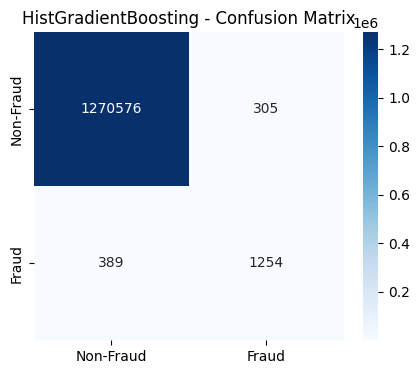


HistGradientBoosting Results:
Accuracy: 0.9994546271818842
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.80      0.76      0.78      1643

    accuracy                           1.00   1272524
   macro avg       0.90      0.88      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524


Training Logistic Regression...
Memory usage before training (GB): 10.03


[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.


Epoch 1, change: 1
Epoch 2, change: 0.29780383
Epoch 3, change: 0.18607878
Epoch 4, change: 0.14147126
Epoch 5, change: 0.12251674
Epoch 6, change: 0.10633626
Epoch 7, change: 0.094711864
Epoch 8, change: 0.0853694
Epoch 9, change: 0.077870839
Epoch 10, change: 0.071486743
Epoch 11, change: 0.066047393
Epoch 12, change: 0.061271468
Epoch 13, change: 0.057148487
Epoch 14, change: 0.053475876
Epoch 15, change: 0.050167538
Epoch 16, change: 0.047249553
Epoch 17, change: 0.044639537
Epoch 18, change: 0.042214063
Epoch 19, change: 0.040002065
Epoch 20, change: 0.037973986
Epoch 21, change: 0.036154167
Epoch 22, change: 0.034441718
Epoch 23, change: 0.032842766
Epoch 24, change: 0.031378261
Epoch 25, change: 0.030048691
Epoch 26, change: 0.028784407
Epoch 27, change: 0.027595652
Epoch 28, change: 0.026463667
Epoch 29, change: 0.025459017
Epoch 30, change: 0.024470114
Epoch 31, change: 0.02358756
Epoch 32, change: 0.022707758
Epoch 33, change: 0.021917897
Epoch 34, change: 0.021156164
Epoch 3

/home/linux/Documents/codes/Fraud-Detection/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


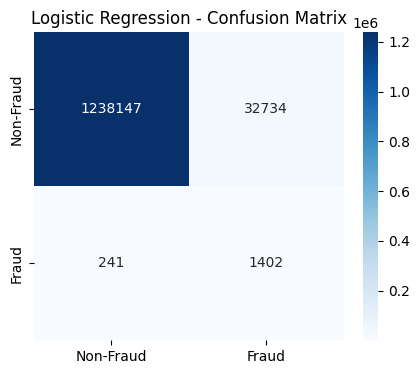


Logistic Regression Results:
Accuracy: 0.9740869327415436
              precision    recall  f1-score   support

           0       1.00      0.97      0.99   1270881
           1       0.04      0.85      0.08      1643

    accuracy                           0.97   1272524
   macro avg       0.52      0.91      0.53   1272524
weighted avg       1.00      0.97      0.99   1272524


Training Random Forest...
Memory usage before training (GB): 10.02


[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.


building tree 1 of 2000
building tree 6 of 2000
building tree 8 of 2000
building tree 9 of 2000
building tree 3 of 2000
building tree 5 of 2000
building tree 10 of 2000
building tree 4 of 2000
building tree 7 of 2000
building tree 12 of 2000
building tree 13 of 2000
building tree 11 of 2000
building tree 14 of 2000
building tree 2 of 2000
building tree 15 of 2000
building tree 16 of 2000
building tree 17 of 2000
building tree 18 of 2000
building tree 19 of 2000
building tree 20 of 2000
building tree 21 of 2000
building tree 22 of 2000
building tree 23 of 2000
building tree 24 of 2000
building tree 25 of 2000
building tree 26 of 2000
building tree 27 of 2000


[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:   29.2s


building tree 28 of 2000
building tree 29 of 2000
building tree 30 of 2000
building tree 31 of 2000
building tree 32 of 2000
building tree 33 of 2000
building tree 34 of 2000
building tree 35 of 2000
building tree 36 of 2000
building tree 37 of 2000
building tree 38 of 2000
building tree 39 of 2000
building tree 40 of 2000
building tree 41 of 2000
building tree 42 of 2000
building tree 43 of 2000
building tree 44 of 2000
building tree 45 of 2000
building tree 46 of 2000
building tree 47 of 2000
building tree 48 of 2000
building tree 49 of 2000
building tree 50 of 2000
building tree 51 of 2000
building tree 52 of 2000
building tree 53 of 2000
building tree 54 of 2000
building tree 55 of 2000
building tree 56 of 2000
building tree 57 of 2000
building tree 58 of 2000
building tree 59 of 2000
building tree 60 of 2000
building tree 61 of 2000
building tree 62 of 2000
building tree 63 of 2000
building tree 64 of 2000
building tree 65 of 2000
building tree 66 of 2000
building tree 67 of 2000


[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:  3.4min


building tree 149 of 2000
building tree 150 of 2000
building tree 151 of 2000
building tree 152 of 2000
building tree 153 of 2000
building tree 154 of 2000
building tree 155 of 2000
building tree 156 of 2000
building tree 157 of 2000
building tree 158 of 2000
building tree 159 of 2000
building tree 160 of 2000
building tree 161 of 2000
building tree 162 of 2000
building tree 163 of 2000
building tree 164 of 2000
building tree 165 of 2000
building tree 166 of 2000
building tree 167 of 2000
building tree 168 of 2000
building tree 169 of 2000
building tree 170 of 2000
building tree 171 of 2000
building tree 172 of 2000
building tree 173 of 2000
building tree 174 of 2000
building tree 175 of 2000
building tree 176 of 2000
building tree 177 of 2000
building tree 178 of 2000
building tree 179 of 2000
building tree 180 of 2000
building tree 181 of 2000
building tree 182 of 2000
building tree 183 of 2000
building tree 184 of 2000
building tree 185 of 2000
building tree 186 of 2000
building tre

[Parallel(n_jobs=14)]: Done 337 tasks      | elapsed:  8.3min


building tree 352 of 2000
building tree 353 of 2000
building tree 354 of 2000
building tree 355 of 2000
building tree 356 of 2000
building tree 357 of 2000
building tree 358 of 2000
building tree 359 of 2000
building tree 360 of 2000
building tree 361 of 2000
building tree 362 of 2000
building tree 363 of 2000
building tree 364 of 2000
building tree 365 of 2000
building tree 366 of 2000
building tree 367 of 2000
building tree 368 of 2000
building tree 369 of 2000
building tree 370 of 2000
building tree 371 of 2000
building tree 372 of 2000
building tree 373 of 2000
building tree 374 of 2000
building tree 375 of 2000
building tree 376 of 2000
building tree 377 of 2000
building tree 378 of 2000
building tree 379 of 2000
building tree 380 of 2000
building tree 381 of 2000
building tree 382 of 2000
building tree 383 of 2000
building tree 384 of 2000
building tree 385 of 2000
building tree 386 of 2000
building tree 387 of 2000
building tree 388 of 2000
building tree 389 of 2000
building tre

[Parallel(n_jobs=14)]: Done 620 tasks      | elapsed: 15.0min


building tree 635 of 2000
building tree 636 of 2000
building tree 637 of 2000
building tree 638 of 2000
building tree 639 of 2000
building tree 640 of 2000
building tree 641 of 2000
building tree 642 of 2000
building tree 643 of 2000
building tree 644 of 2000
building tree 645 of 2000
building tree 646 of 2000
building tree 647 of 2000
building tree 648 of 2000
building tree 649 of 2000
building tree 650 of 2000
building tree 651 of 2000
building tree 652 of 2000
building tree 653 of 2000
building tree 654 of 2000
building tree 655 of 2000
building tree 656 of 2000
building tree 657 of 2000
building tree 658 of 2000
building tree 659 of 2000
building tree 660 of 2000
building tree 661 of 2000
building tree 662 of 2000building tree 663 of 2000

building tree 664 of 2000
building tree 665 of 2000
building tree 666 of 2000
building tree 667 of 2000
building tree 668 of 2000
building tree 669 of 2000
building tree 670 of 2000
building tree 671 of 2000
building tree 672 of 2000
building tre

[Parallel(n_jobs=14)]: Done 985 tasks      | elapsed: 23.3min


building tree 1000 of 2000
building tree 1001 of 2000
building tree 1002 of 2000
building tree 1003 of 2000
building tree 1004 of 2000
building tree 1005 of 2000
building tree 1006 of 2000
building tree 1007 of 2000
building tree 1008 of 2000
building tree 1009 of 2000
building tree 1010 of 2000
building tree 1011 of 2000
building tree 1012 of 2000
building tree 1013 of 2000
building tree 1014 of 2000
building tree 1015 of 2000
building tree 1016 of 2000
building tree 1017 of 2000
building tree 1018 of 2000
building tree 1019 of 2000
building tree 1020 of 2000
building tree 1021 of 2000
building tree 1022 of 2000
building tree 1023 of 2000
building tree 1024 of 2000
building tree 1025 of 2000
building tree 1026 of 2000
building tree 1027 of 2000
building tree 1028 of 2000
building tree 1029 of 2000
building tree 1030 of 2000
building tree 1031 of 2000
building tree 1032 of 2000
building tree 1033 of 2000
building tree 1034 of 2000
building tree 1035 of 2000
building tree 1036 of 2000
b

[Parallel(n_jobs=14)]: Done 1430 tasks      | elapsed: 33.9min


building tree 1445 of 2000
building tree 1446 of 2000
building tree 1447 of 2000
building tree 1448 of 2000
building tree 1449 of 2000
building tree 1450 of 2000
building tree 1451 of 2000
building tree 1452 of 2000
building tree 1453 of 2000
building tree 1454 of 2000
building tree 1455 of 2000
building tree 1456 of 2000
building tree 1457 of 2000
building tree 1458 of 2000
building tree 1459 of 2000
building tree 1460 of 2000
building tree 1461 of 2000
building tree 1462 of 2000
building tree 1463 of 2000
building tree 1464 of 2000
building tree 1465 of 2000
building tree 1466 of 2000
building tree 1467 of 2000
building tree 1468 of 2000
building tree 1469 of 2000
building tree 1470 of 2000
building tree 1471 of 2000
building tree 1472 of 2000
building tree 1473 of 2000
building tree 1474 of 2000
building tree 1475 of 2000
building tree 1476 of 2000
building tree 1477 of 2000
building tree 1478 of 2000
building tree 1479 of 2000
building tree 1480 of 2000
building tree 1481 of 2000
b

[Parallel(n_jobs=14)]: Done 1957 tasks      | elapsed: 46.9min


building tree 1972 of 2000
building tree 1973 of 2000
building tree 1974 of 2000
building tree 1975 of 2000
building tree 1976 of 2000
building tree 1977 of 2000
building tree 1978 of 2000
building tree 1979 of 2000
building tree 1980 of 2000
building tree 1981 of 2000
building tree 1982 of 2000
building tree 1983 of 2000
building tree 1984 of 2000
building tree 1985 of 2000
building tree 1986 of 2000
building tree 1987 of 2000
building tree 1988 of 2000
building tree 1989 of 2000
building tree 1990 of 2000
building tree 1991 of 2000
building tree 1992 of 2000
building tree 1993 of 2000
building tree 1994 of 2000
building tree 1995 of 2000
building tree 1996 of 2000
building tree 1997 of 2000
building tree 1998 of 2000
building tree 1999 of 2000
building tree 2000 of 2000


[Parallel(n_jobs=14)]: Done 2000 out of 2000 | elapsed: 47.9min finished
[Parallel(n_jobs=14)]: Using backend ThreadingBackend with 14 concurrent workers.
[Parallel(n_jobs=14)]: Done  13 tasks      | elapsed:    0.2s
[Parallel(n_jobs=14)]: Done 134 tasks      | elapsed:    1.2s
[Parallel(n_jobs=14)]: Done 337 tasks      | elapsed:    3.2s
[Parallel(n_jobs=14)]: Done 620 tasks      | elapsed:    5.6s
[Parallel(n_jobs=14)]: Done 985 tasks      | elapsed:    8.8s
[Parallel(n_jobs=14)]: Done 1430 tasks      | elapsed:   13.0s
[Parallel(n_jobs=14)]: Done 1957 tasks      | elapsed:   18.1s


Random Forest training completed in 2894.44 seconds
Memory usage after training (GB): 12.29


[Parallel(n_jobs=14)]: Done 2000 out of 2000 | elapsed:   18.5s finished


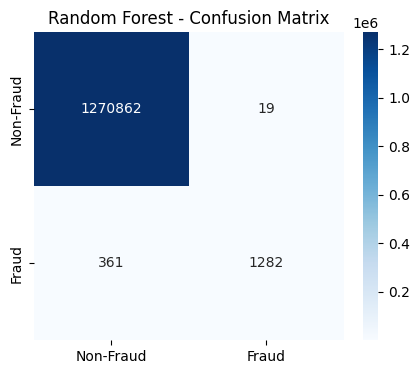


Random Forest Results:
Accuracy: 0.9997013808776888
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.78      0.87      1643

    accuracy                           1.00   1272524
   macro avg       0.99      0.89      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [4]:
# Function to train and evaluate
def train_and_eval(name, model):
    print(f"\nTraining {name}...")
    print(f"Memory usage before training (GB): {psutil.virtual_memory().used / (1024 ** 3):.2f}")
    
    # Use 'threading' backend for lower overhead
    backend = 'threading'
    start_time = time.time()
    with parallel_backend(backend, n_jobs=-1):
        if name == "Logistic Regression":
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
    
    training_time = time.time() - start_time
    print(f"{name} training completed in {training_time:.2f} seconds")
    print(f"Memory usage after training (GB): {psutil.virtual_memory().used / (1024 ** 3):.2f}")
    
    acc = accuracy_score(y_test, y_pred)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=["Non-Fraud", "Fraud"],
                yticklabels=["Non-Fraud", "Fraud"])
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))
    
    return {"Model": name, "Accuracy": acc, "Training Time (s)": training_time}

# Run models and collect results
results = []
for name, model in models.items():
    result = train_and_eval(name, model)
    results.append(result)



Model Comparison:


,Model,Accuracy,Training Time (s)
0,HistGradientBoosting,0.999455,4.954455
1,Logistic Regression,0.974087,2593.665556
2,Random Forest,0.999701,2894.443333


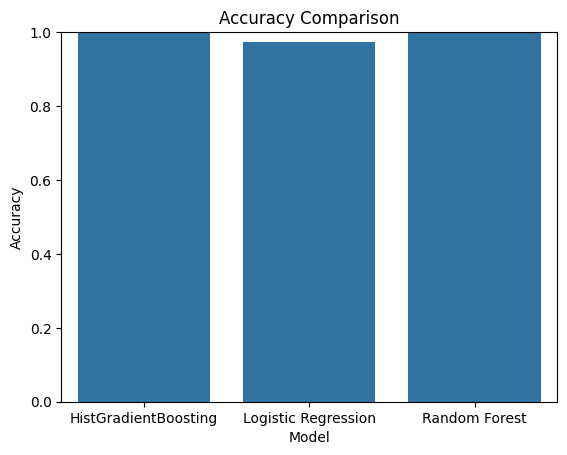

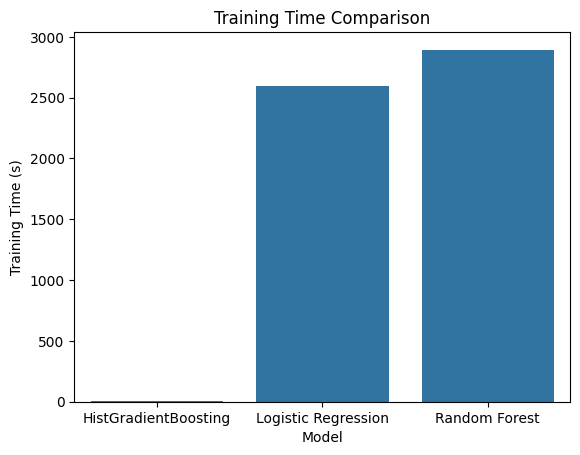

In [5]:

# Compare results
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
display(results_df)

# Plots
sns.barplot(data=results_df, x="Model", y="Accuracy")
plt.title("Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

sns.barplot(data=results_df, x="Model", y="Training Time (s)")
plt.title("Training Time Comparison")
plt.show()

In [8]:
from joblib import dump

# Save models
for name, model in models.items():
    dump(model, f"{name.replace(' ', '_')}_model.joblib")

# Save preprocessors
dump(le, "label_encoder.joblib")
dump(scaler, "standard_scaler.joblib")

print("Models and preprocessors saved successfully.")

Models and preprocessors saved successfully.
